In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sales_masked.csv')
print(data.keys())
# data.isnull().sum().to_frame()
data.sort_values('DayKey', inplace=True)

data_np = data.to_numpy()
data_np

keep_le = []

def gen_GAC():
    gen_G =[]
    for i in range(1,11):
        gen_G.append('G'+str(i%11))
    gen_A =[]
    for i in range(1,7):
        gen_A.append('A'+str(i%7))
    gen_C =[]
    for i in range(1,3):
        gen_C.append('C'+str(i%3))

    string = []
    for i in range(10):
        for j in range(12):
            string.append(gen_G[i]+gen_A[j%6])
    sum =0
    count = 1
    for i in range(120):
        if sum < 6   :
            string[i] += 'C'+'1'
            sum +=1
        else :
            string[i] += 'C'+'2'
            sum +=1
            if sum == 12 :
                sum = 0
    return string
# หาindex 
def findrecode(product, area, chanel):
        row = 0
        pac = gen_GAC()
        for i in range(len(pac)):
            if len(pac[i]) > 6 :
                if pac[i][0:3] == product and pac[i][3:5] == area and pac[i][5:] == chanel: #แก้ตรงนี้
                    row = i
                    break
            else :
                if pac[i][0:2] == product and pac[i][2:4] == area and pac[i][4:] == chanel: #แก้ตรงนี้
                    row = i
                    break
        return row

sum=0
def transform_d(G,check=False,product=None,area=None,chanel=None):
    if check != True:
        global sum
        for i in range(4):
            le = LabelEncoder()
            keep_le.append(le)
            G[:, i] = keep_le[sum].fit_transform(G[:, i])
            sum += 1
    else:
        index = findrecode(product, area, chanel) #หาข้อมูลตำแน่งที่ต้องการ จะเปลี่ยนว่าจะไป อยู่ในตัวใดจาก 120 ตัว
        # print(index)
        for i in range(G.shape[1]-2):
            G[:,i] = keep_le[int(arr[index][i])].fit_transform(G[:,i])

# สำหรับอ้างอิงตำแหน่งใน keep_le
arr = np.zeros((120, 4))
xum = 0
for i in range(120):
    for j in range(4):
        arr[i][j] += xum
        xum += 1
        
# print(arr)

# #product group 1 Area 1 channel 1
def identifier(product, area, chanel):
    G = []
    for i in range(data_np.shape[0]):
        if data_np[i, 1] == product and data_np[i, 2] == area and data_np[i, 3] == chanel:
            G.append(data_np[i, :])
    G = np.array(G)
    transform_d(G)  # problem
    return G



Index(['DayKey', 'ProductGroup', 'Area', 'Channel', 'Sales', 'CumSales'], dtype='object')


In [11]:
# print(len(keep_le)) #เช็คตำนวน encode

# Good
def get_inverse(G,index):
    xx = []
    for i in range(G.shape[0]):
        xx.append(G[i,index])
    return xx

# not yet
def inverse_d(G,product, area, chanel):
    # print(product, area, chanel)
    index = findrecode(product, area, chanel) #หาข้อมูลตำแน่งที่ต้องการ จะเปลี่ยนว่าจะไป อยู่ในตัวใดจาก 120 ตัว
    # print(index)
    for i in range(G.shape[1]-2): # columns - 2 
        xx = get_inverse(G,i) # เอาข้อมูลจาก ฟังก์ชันมาแปลง กลับ เป็นตัวเดิม
        # print(xx)
        G[:,i] = keep_le[int(arr[index][i])].inverse_transform(xx)


In [12]:
G111 = identifier('G1','A1','C1')


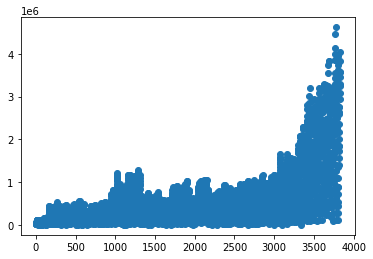

In [13]:

plt.scatter(G111[:, 0], G111[:, 5])
plt.show()

In [22]:
neigh = KNeighborsRegressor(n_neighbors=1)

date = []
for i in range(G111.shape[0]):
    date.append([G111[i, 0]])
# print(date)
neigh.fit(date, G111[:, 5])

result = []
for i in range(G111[0, 0], G111[-1, 0], 1):
    result.append(neigh.predict([[i]]))
result = np.array(result)
# print(G111[0, 0], G111[-1, 0])
print(len(result))

print(len(G111[:, 0]))

print(result)
# plt.plot(range(G111[0, 0], G111[-1, 0], 1), result)
# plt.show()




3831
3832
[[10794.0]
 [16191.0]
 [19069.0]
 ...
 [3568866.0]
 [3583821.0]
 [3836378.0]]


In [17]:
for()
[G111[:, 0]]

[array([0, 1, 2, ..., 3829, 3830, 3831], dtype=object)]